# Úloha č.4
- Interpolace a aproximace funkce jedné proměnné

## Knihovny

In [9]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Výpočet

Funkce 1 MSE:
  Kubická: 0.011113375392271191
  Lineární: 1.2282409360032993
  Nejbližší: 40377.12828434711

Funkce 2 MSE:
  Kubická: 0.015606098749734789
  Lineární: 0.11772045620527827
  Nejbližší: 0.3337689463742556

Funkce 3 MSE:
  Kubická: 0.01261473574802528
  Lineární: 0.009297597778898936
  Nejbližší: 0.019994717991254567



<Figure size 1400x1200 with 0 Axes>

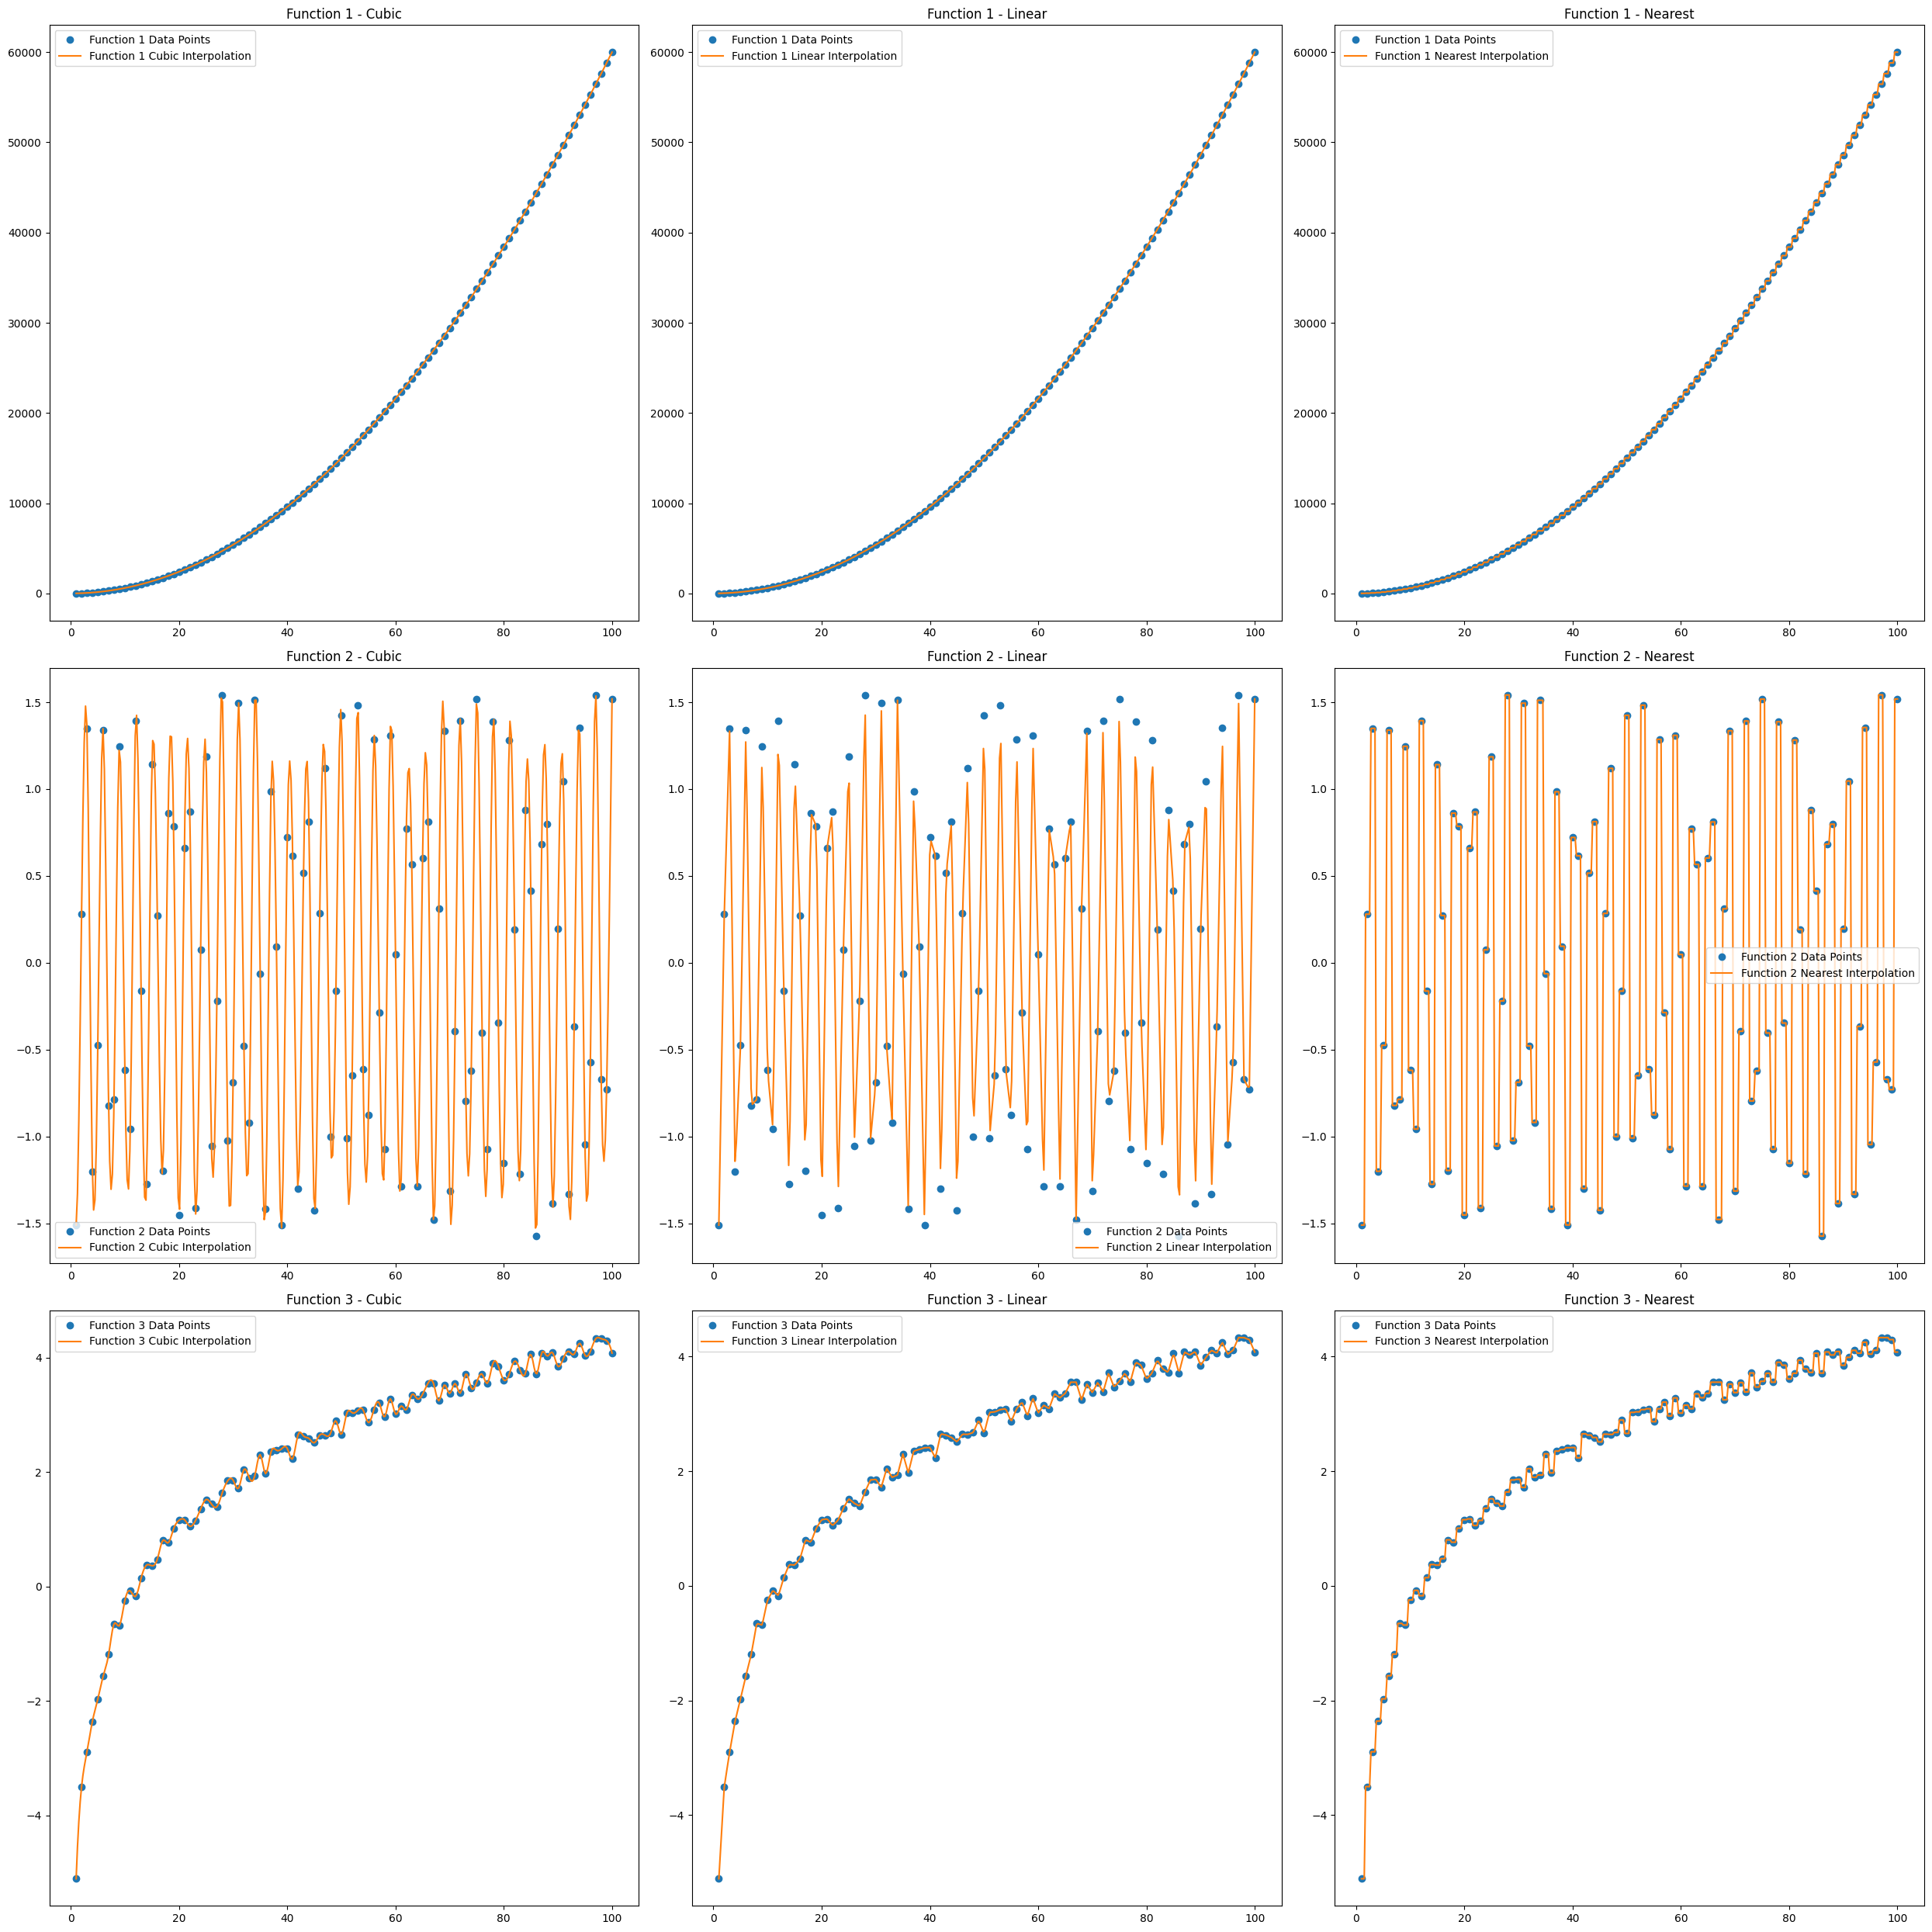

In [16]:
# List
f_1 = lambda x: 6*x**2
f_2 = lambda x: np.cos(2*x) - np.sin(2*x)
f_3 = lambda x: np.log(x**2) - 5

original_functions = [f_1, f_2, f_3]
point_list = [[], [], []]

# Rozkmitání
for i in range(1, 101):
    oscillation = lambda: random.uniform(-0.2, 0.2)
    point_list[0].append(f_1(i) + oscillation())
    point_list[1].append(f_2(i) + oscillation())
    point_list[2].append(f_3(i) + oscillation())

x_points = np.arange(1, 101)
x_new = np.linspace(1, 100, 400)

cubic = [[], [], []]
linear = [[], [], []]
nearest = [[], [], []]

for i in range(3):
    interp_f_1 = interp1d(x_points, point_list[i], kind='cubic')
    interp_f_2 = interp1d(x_points, point_list[i], kind='linear')
    interp_f_3 = interp1d(x_points, point_list[i], kind='nearest')
    cubic[i] = interp_f_1(x_new)
    linear[i] = interp_f_2(x_new)
    nearest[i] = interp_f_3(x_new)

plt.figure(figsize=(14, 12))

f = ['Cubic', 'Linear', 'Nearest']
interpolated_points = [cubic, linear, nearest]

#mse
def mse(true_values, interpolated_values):
    return np.mean((true_values - interpolated_values)**2)

true_values = [[], [], []]
for i in range(3):
    true_values[i] = original_functions[i](x_new)

mse_cubic = [mse(true_values[i], cubic[i]) for i in range(3)]
mse_linear = [mse(true_values[i], linear[i]) for i in range(3)]
mse_nearest = [mse(true_values[i], nearest[i]) for i in range(3)]

for i in range(3):
    print(f"Funkce {i+1} MSE:")
    print(f"  Kubická: {mse_cubic[i]}")
    print(f"  Lineární: {mse_linear[i]}")
    print(f"  Nejbližší: {mse_nearest[i]}")
    print()

plt.figure(figsize=(25, 25))

f = ['Cubic', 'Linear', 'Nearest']
interpolated_points = [cubic, linear, nearest]

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.plot(x_points, point_list[i], 'o', label=f'Function {i+1} Data Points')
        plt.plot(x_new, interpolated_points[j][i], '-', label=f'Function {i+1} {f[j]} Interpolation')
        plt.title(f'Function {i+1} - {f[j]}')
        plt.legend()

plt.tight_layout()
plt.show()